In [6]:
import import_ipynb
import Neural_Net as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from tensorflow.contrib.learn.python.learn.estimators._sklearn import train_test_split

# load the dataset
X, Y = nn.load_data()
# split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=1)


In [3]:
# prepare input data
xtrain_enc, xtest_enc = nn.prepare_inputs(xtrain, xtest)
# prepare output data
ytrain_enc, ytest_enc = nn.prepare_targets(ytrain, ytest)

c:\users\plus sys\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [4]:
from sklearn import svm

y_pred = np.zeros(ytest_enc.shape)

#Create a svm Classifier
def SVM(kernel):
    clf = svm.SVC(kernel=kernel) # Linear Kernel

    #Train the model using the training sets
    clf.fit(xtrain_enc, ytrain_enc)

    #Predict the response for test dataset
    y_pred = clf.predict(xtest_enc)
    return y_pred
    

Best Kernel:  poly 

            predicted cancer  predicted no cancer
has cancer                11                   14
no cancer                  7                   54

Accuracy: 0.7558139534883721 



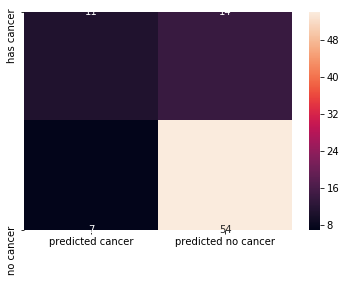

In [5]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

accuracy = []
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    y_pred = SVM(kernel)
    accuracy.append(metrics.accuracy_score(ytest_enc, y_pred))
    cm = np.array(confusion_matrix(ytest_enc,y_pred, labels =[1,0]))
    
kernel = kernels[accuracy.index(max(accuracy))]

print("Best Kernel: " , kernel, '\n')

y_pred = SVM(kernel)
cm = np.array(confusion_matrix(ytest_enc,y_pred, labels =[1,0]))

confusion = pd.DataFrame(cm, index = ['has cancer','no cancer'], columns= ['predicted cancer', 'predicted no cancer'])
print(confusion)
sns.heatmap(confusion, annot = True)
    
print("\nAccuracy:",metrics.accuracy_score(ytest_enc, y_pred),"\n")